# fmpm examples

### Set 1: Data prep
Before you are able to train a model, first you must have data in the appropriate format. In its current state, that means:
* All images must be in the same directory in your file system
* Your labels must be in a pandas dataframe with two columns
    - File: Filename of image
    - isPlastic: One hot encoded binary class

To help with preparing your data we have a few helper functions in prep.py.

First we have add_filenames. Which takes in a dataframe with a column named 'Sample'. Based on the words in sample, it will search through the image directory to find the appropraite image filename. It will return a new dataframe with an additional column, 'File' containing filenames and with the 'Sample' column split on the first space.

In [1]:
import pandas as pd
import prep

In [2]:
df = pd.read_csv('../fmpm/tests/test_data/10x_labels_4.csv')
df.head(10)

,Sample,Sample origin,Description,Size (um),Identification
0,252_2,mussels,opaque fiber,50,non-microplastic
1,252_3,mussels,opaque spheroid,25,non-microplastic
2,252_6,mussels,white spheroid,50,Nylon
3,252_9,mussels,clear fragment,100,quartz
4,252_10,mussels,clear fragment,50,quartz
5,20200824 272_2,mussels,dark fragment,60,carbon fiber
6,20200819 135_1,mussels,dark fiber,50,non-microplastic
7,2020819 252_4,mussels,blue shard,50,ink + plastic
8,2020819 252_5,mussels,opaque shard,30,non-microplastic
9,20200818 72_3,mussels,opaque spheroid,50,orthoclase


In [3]:
image_dir = '../fmpm/tests/test_data/images_10x'
df_with_file = prep.add_filenames(df, image_dir)
df_with_file.head(10)

,Sample,File,Sample origin,Description,Size (um),Identification
0,[252_2],252_2 - 10x.bmp,mussels,opaque fiber,50,non-microplastic
1,[252_3],252_3 - 10x.bmp,mussels,opaque spheroid,25,non-microplastic
2,[252_6],252_6 - 10x.bmp,mussels,white spheroid,50,Nylon
3,[252_9],252_9 - 10x.bmp,mussels,clear fragment,100,quartz
4,[252_10],252_10 - 10x.bmp,mussels,clear fragment,50,quartz
5,"[20200824, 272_2]",20200824 272_2 - 10x.bmp,mussels,dark fragment,60,carbon fiber
6,"[20200819, 135_1]",20200819 135_1 - 10x.bmp,mussels,dark fiber,50,non-microplastic
7,"[2020819, 252_4]",None,mussels,blue shard,50,ink + plastic
8,"[2020819, 252_5]",None,mussels,opaque shard,30,non-microplastic
9,"[20200818, 72_3]",20200818 72_3 - 10x.bmp,mussels,opaque spheroid,50,orthoclase


Now we have filenames in the 'File' column of our dataframe. In the case where it cannot find the filename it will place None. To remove the None's use pandas dropna() and reset_index()

In [4]:
df_no_nones = df_with_file.dropna().reset_index(drop=True)
df_no_nones.head(10)

,Sample,File,Sample origin,Description,Size (um),Identification
0,[252_2],252_2 - 10x.bmp,mussels,opaque fiber,50,non-microplastic
1,[252_3],252_3 - 10x.bmp,mussels,opaque spheroid,25,non-microplastic
2,[252_6],252_6 - 10x.bmp,mussels,white spheroid,50,Nylon
3,[252_9],252_9 - 10x.bmp,mussels,clear fragment,100,quartz
4,[252_10],252_10 - 10x.bmp,mussels,clear fragment,50,quartz
5,"[20200824, 272_2]",20200824 272_2 - 10x.bmp,mussels,dark fragment,60,carbon fiber
6,"[20200819, 135_1]",20200819 135_1 - 10x.bmp,mussels,dark fiber,50,non-microplastic
7,"[20200818, 72_3]",20200818 72_3 - 10x.bmp,mussels,opaque spheroid,50,orthoclase
8,"[20200818, 72_5]",20200818 72_5 - 10x.bmp,mussels,opaque irregular,25,filter paper
9,"[20200817, 110_3]",20200817 110_3 - 10x.bmp,mussels,opaque irregular,100,quartz


Next, to develop the 'isPlastic' column, we can call the function convert_plastics(). It will search through a column called 'Identification' and replace it will a column 'isPlastic' of boolean integers. Then we can call encode_column() which will one hot encode any dataframe column

In [5]:
df_with_plastics = prep.convert_plastics(df_no_nones)
df_with_plastics.head(10)

/Users/Will/GradSchool/CHEME/Project/FmPM/fmpm/prep.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identification[i] = False
/Users/Will/GradSchool/CHEME/Project/FmPM/fmpm/prep.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identification[i] = True


,Sample,File,Sample origin,Description,Size (um),isPlastic
0,[252_2],252_2 - 10x.bmp,mussels,opaque fiber,50,0
1,[252_3],252_3 - 10x.bmp,mussels,opaque spheroid,25,0
2,[252_6],252_6 - 10x.bmp,mussels,white spheroid,50,1
3,[252_9],252_9 - 10x.bmp,mussels,clear fragment,100,0
4,[252_10],252_10 - 10x.bmp,mussels,clear fragment,50,0
5,"[20200824, 272_2]",20200824 272_2 - 10x.bmp,mussels,dark fragment,60,1
6,"[20200819, 135_1]",20200819 135_1 - 10x.bmp,mussels,dark fiber,50,0
7,"[20200818, 72_3]",20200818 72_3 - 10x.bmp,mussels,opaque spheroid,50,0
8,"[20200818, 72_5]",20200818 72_5 - 10x.bmp,mussels,opaque irregular,25,0
9,"[20200817, 110_3]",20200817 110_3 - 10x.bmp,mussels,opaque irregular,100,0


In [6]:
df_with_plastics['isPlastic'] = prep.encode_column(df_with_plastics[['isPlastic']])
df_with_plastics.head(10)

,Sample,File,Sample origin,Description,Size (um),isPlastic
0,[252_2],252_2 - 10x.bmp,mussels,opaque fiber,50,"[1, 0]"
1,[252_3],252_3 - 10x.bmp,mussels,opaque spheroid,25,"[1, 0]"
2,[252_6],252_6 - 10x.bmp,mussels,white spheroid,50,"[0, 1]"
3,[252_9],252_9 - 10x.bmp,mussels,clear fragment,100,"[1, 0]"
4,[252_10],252_10 - 10x.bmp,mussels,clear fragment,50,"[1, 0]"
5,"[20200824, 272_2]",20200824 272_2 - 10x.bmp,mussels,dark fragment,60,"[0, 1]"
6,"[20200819, 135_1]",20200819 135_1 - 10x.bmp,mussels,dark fiber,50,"[1, 0]"
7,"[20200818, 72_3]",20200818 72_3 - 10x.bmp,mussels,opaque spheroid,50,"[1, 0]"
8,"[20200818, 72_5]",20200818 72_5 - 10x.bmp,mussels,opaque irregular,25,"[1, 0]"
9,"[20200817, 110_3]",20200817 110_3 - 10x.bmp,mussels,opaque irregular,100,"[1, 0]"


Finally, we must make a 'Shape' and 'Color' column. Using split_description. Then the data is in a form that the dataset class tenX_dataset in prep.py can parse. We recommend saving the prepared dataframe using pd.save_csv(), so that you don't have to repeat the preparation process. There are additional functions in prep.py for splitting a 'Description' column into a 'Color' and 'Shape' column and a function called prep_data() which will perform all prep operations on a single dataframe. 

In [7]:
df_final = prep.split_description(df_with_plastics)
df_final.head(10)

,Sample,File,Sample origin,Size (um),isPlastic,Color,Shape
0,[252_2],252_2 - 10x.bmp,mussels,50,"[1, 0]",opaque,fiber
1,[252_3],252_3 - 10x.bmp,mussels,25,"[1, 0]",opaque,spheroid
2,[252_6],252_6 - 10x.bmp,mussels,50,"[0, 1]",white,spheroid
3,[252_9],252_9 - 10x.bmp,mussels,100,"[1, 0]",clear,fragment
4,[252_10],252_10 - 10x.bmp,mussels,50,"[1, 0]",clear,fragment
5,"[20200824, 272_2]",20200824 272_2 - 10x.bmp,mussels,60,"[0, 1]",dark,fragment
6,"[20200819, 135_1]",20200819 135_1 - 10x.bmp,mussels,50,"[1, 0]",dark,fiber
7,"[20200818, 72_3]",20200818 72_3 - 10x.bmp,mussels,50,"[1, 0]",opaque,spheroid
8,"[20200818, 72_5]",20200818 72_5 - 10x.bmp,mussels,25,"[1, 0]",opaque,irregular
9,"[20200817, 110_3]",20200817 110_3 - 10x.bmp,mussels,100,"[1, 0]",opaque,irregular


### Set 2: Model building
Now to start training first we must put our data into a pytorch dataset class. There is a custom dataset class in prep.py called tenX_dataset that can be invoked. It takes the dataframe with 'File' and 'isPlastic'. Additionally, if desired, it takes a pytorch transform shown below. 

In [8]:
import construct
import torchvision
import torch
import matplotlib.pyplot as plt

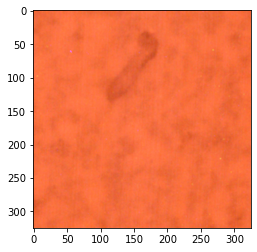

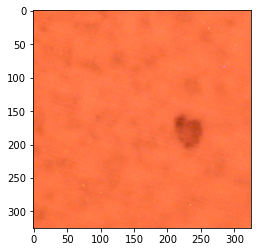

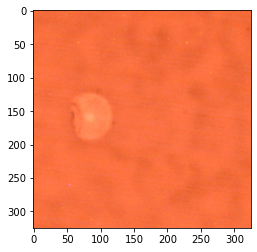

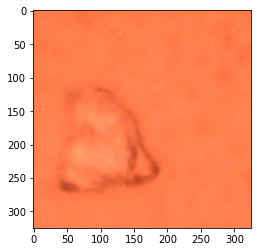

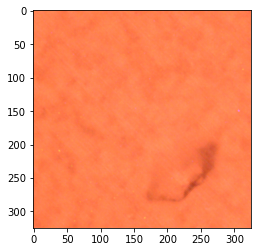

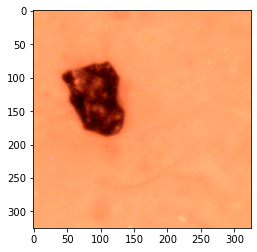

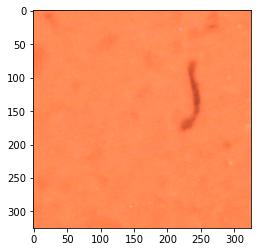

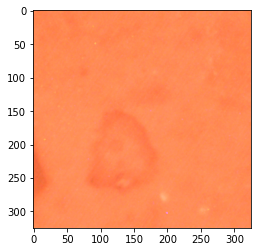

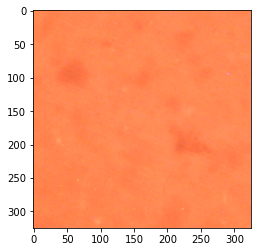

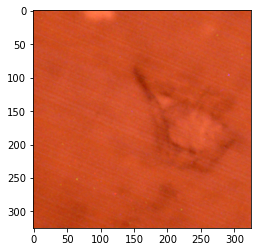

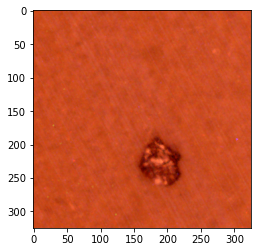

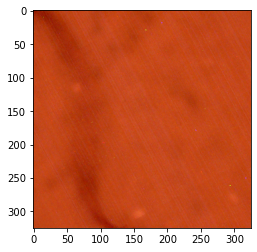

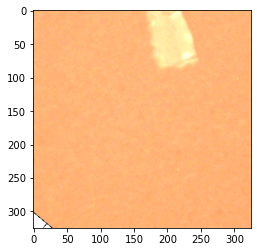

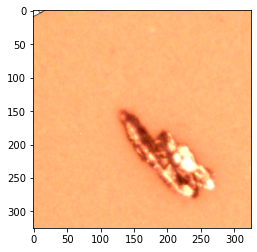

In [9]:
transforms = torchvision.transforms.Compose([
                            torchvision.transforms.ToPILImage(),
                            torchvision.transforms.RandomRotation((-180,180)),
                            torchvision.transforms.CenterCrop((325)),
                            torchvision.transforms.ToTensor()
                                      ])

dataset = prep.tenX_dataset(df_with_plastics, image_dir, transforms)


for i in range(len(dataset)):
    image = dataset[i]['image']
    plt.figure(i)
    plt.imshow(image.T)

Now we can train a model on our data using train() in construct.py. train() has several arguements.  
**Required args:** 
* epochs: number of training epochs 
* batch_size: the batch_size per training run
* dataset: the dataset class to train on 

**Optional args:**
* criterion: a loss function (default cross entropy loss)
* optimizer: a optimizer (default adam with lr=.0015)
* model: the model to train (defaults to model found in contstruct.py)
* device: the device to perform calulcation on (defaults to cpu)


First lets use the default parameters. train() will return an instance of the model, the loss for each batch, and the accuracy for each batch. 

In [10]:
model, loss, acc = construct.train(10, 1, dataset)

EPOCH: 0, acc: 0.42857142857142855, loss: 16.486342089516768
EPOCH: 1, acc: 0.7142857142857143, loss: 5.785937121935548
EPOCH: 2, acc: 0.7142857142857143, loss: 3.054552147859261
EPOCH: 3, acc: 0.6428571428571429, loss: 3.6067423290179446
EPOCH: 4, acc: 0.5714285714285714, loss: 5.1312537676915
EPOCH: 5, acc: 0.6428571428571429, loss: 2.32345512397751
EPOCH: 6, acc: 0.7857142857142857, loss: 1.4090087048274225
EPOCH: 7, acc: 0.5, loss: 2.2359169519019946
EPOCH: 8, acc: 0.5714285714285714, loss: 1.5041452873099064
EPOCH: 9, acc: 0.5714285714285714, loss: 1.9520516402063939
EPOCH: 10, acc: 0.6428571428571429, loss: 2.5795142844569545


Text(0.5, 0, 'epochs')

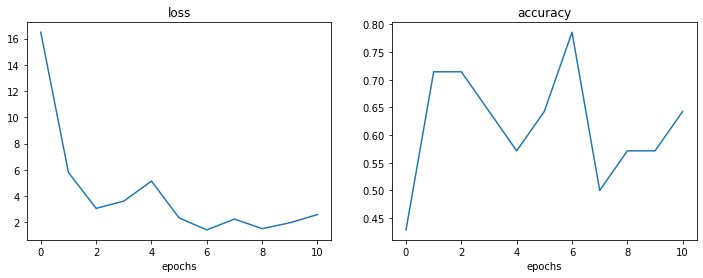

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(loss)
ax2.plot(acc)
ax1.set_title('loss')
ax2.set_title('accuracy')
ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')

Lets train again this time though we will split our data into a train and test and use get_predictions() which will take a model and a dataset and return the images, labels, predictions, weight of predictions, and accuracy of the predictions. We will also define our model and optimizer explicitly. 

In [12]:
class my_model(torch.nn.Module):
    def __init__(self):
        """
        Initializes CNN. Here we just define layer shapes that we call in the forward func
        """
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels = 3, 
                               out_channels = 6, 
                               kernel_size = 5)
                
        #Convultion layer 2. See above
        self.conv2 = torch.nn.Conv2d(in_channels = 6, 
                               out_channels = 12, 
                               kernel_size = 5)
        
        self.fc_1 = torch.nn.Linear(39 * 39 * 12, 256)
        self.fc_2 = torch.nn.Linear(256, 2)
            
    def forward(self, x):
        """
        Function that performs all the neural network forward calculation i.e.
        takes image data from the input of the neural network to the output
        """
        
        x = self.conv1(x)
        x = torch.nn.functional.max_pool2d(x, kernel_size = 2)
        x = torch.nn.functional.leaky_relu(x)
        x = self.conv2(x)
        x = torch.nn.functional.max_pool2d(x, kernel_size = 4)
        x = torch.nn.functional.leaky_relu(x)
        x = x.view(x.shape[0], -1)  
        x = self.fc_1(x) 
        x = torch.nn.functional.leaky_relu(x)
        x = self.fc_2(x) 
        return x

model = my_model()
my_optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [13]:
train, test = torch.utils.data.random_split(dataset, [round(.2*len(dataset)), round(len(dataset)-.2*len(dataset))])
print(len(train), len(test))

3 11


In [14]:
model, loss, acc = construct.train(10, 1, dataset, model=model, optimizer=my_optimizer)

EPOCH: 0, acc: 0.35714285714285715, loss: 80.65856456779875
EPOCH: 1, acc: 0.5714285714285714, loss: 2.1021291141296308
EPOCH: 2, acc: 0.7142857142857143, loss: 0.7829397395253181
EPOCH: 3, acc: 0.7142857142857143, loss: 0.6605832310659545
EPOCH: 4, acc: 0.7142857142857143, loss: 0.6232059001922607
EPOCH: 5, acc: 0.7142857142857143, loss: 0.640876764697688
EPOCH: 6, acc: 0.7142857142857143, loss: 0.8631104358604976
EPOCH: 7, acc: 0.42857142857142855, loss: 2.240690642701728
EPOCH: 8, acc: 0.7142857142857143, loss: 0.6022026091814041
EPOCH: 9, acc: 0.7142857142857143, loss: 0.594939649105072
EPOCH: 10, acc: 0.7142857142857143, loss: 0.6022396694336619


In [15]:
images, labels, predictions, weights, acc = construct.get_predictions(1, model, test)
acc

tensor(0.7273)

To save a model to the filesystem, use contruct.save_model(model, filepath). To load it, use load_model_from_file(filepath). 